In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression,LassoCV,Lasso,RidgeCV,Ridge
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')

In [2]:
# Loading data set
df = pd.read_csv("house-prices.csv")
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,764,904301070,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2426,836,907126010,20,RL,82.0,12464,Pave,NaN,IR2,Low,...,0,NaN,GdPrv,NaN,0,11,2009,WD,Normal,152000
2427,1654,527353080,60,RL,80.0,11584,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,197000
2428,2608,535402070,80,RL,85.0,13400,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,6,2006,WD,Normal,159950


In [3]:
# Now dropping the 'PID' and 'Order' column since it's unnecessary for the prediction process.
df.drop("PID", axis = 1, inplace = True)
df.drop("Order", axis = 1, inplace = True)

In [4]:
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2426,20,RL,82.0,12464,Pave,NaN,IR2,Low,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,11,2009,WD,Normal,152000
2427,60,RL,80.0,11584,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,197000
2428,80,RL,85.0,13400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,6,2006,WD,Normal,159950


In [5]:
# Checking Categorical Data
df.select_dtypes(include=['object']).columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [6]:
# Checking Discrete Data
df.select_dtypes(include=['int64']).columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [7]:
# Checking Continuous Data
df.select_dtypes(include=['float64']).columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [8]:
#correcting the data types (based on the documentation)
for col in ('Year Built','Year Remod/Add','Lot Area', '1st Flr SF', '2nd Flr SF',
            'Low Qual Fin SF', 'Gr Liv Area','Wood Deck SF','Open Porch SF',
            'Enclosed Porch', '3Ssn Porch', 'Screen Porch','Pool Area', 'Misc Val' ,'Yr Sold','SalePrice'):
    df[col] = df[col].astype(float)

In [9]:
for col in ('MS SubClass','Mo Sold'):
    df[col] = df[col].astype(str)

In [10]:
# checking missing values
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      420
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [11]:
# Finding missing ratio of features in the training dataset
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data

,Missing Ratio
Pool QC,99.506173
Misc Feature,96.296296
Alley,93.292181
Fence,79.876543
Fireplace Qu,48.806584
Lot Frontage,17.283951
Garage Yr Blt,5.679012
Garage Cond,5.679012
Garage Qual,5.679012
Garage Finish,5.679012


Text(0.5, 1.0, 'Percent missing data by feature')

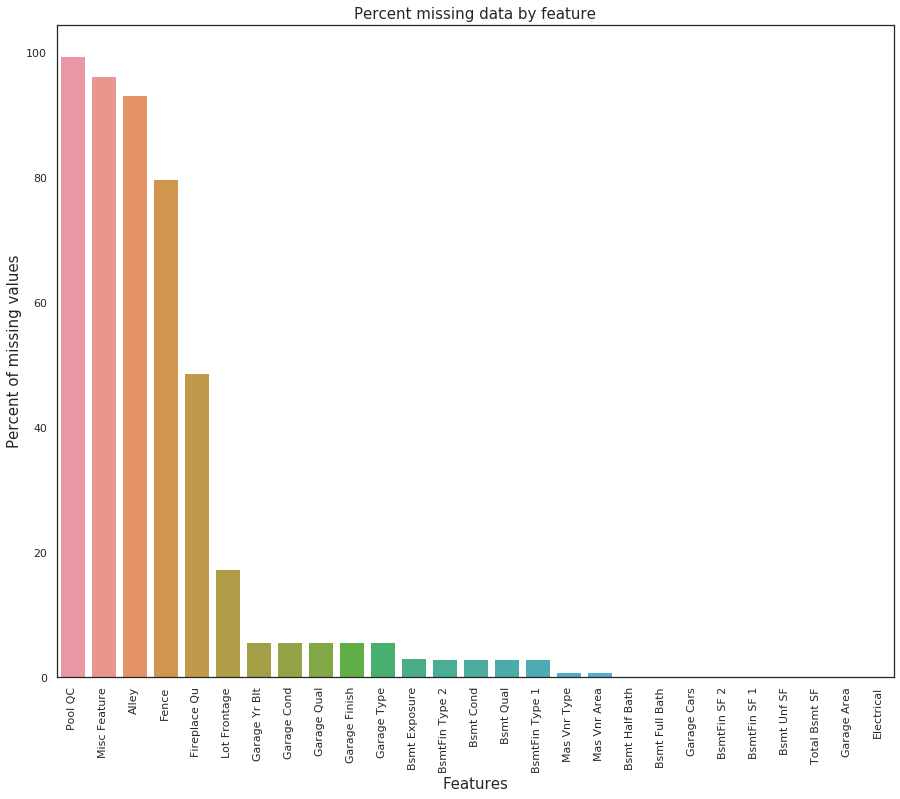

In [12]:
# Plot of percent missing by feature
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=df_na.index, y=df_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [13]:
# dropping the four features with the highest missing ratio (more than 50%)
for col in df_na.index[:4]:
    df = df.drop([col], axis=1)
df.drop("Lot Frontage", axis = 1, inplace = True)

In [14]:
# The categorical feature 'Fireplace' has a lot of missing data and also think it is required for house price so did not drop this feature
# So, replace them by 'None'

df['Fireplace Qu'].fillna('None',inplace = True)

In [15]:
# filling the missing values in numerical features using their medians

for col in ('Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Half Bath',
       'Bsmt Full Bath', 'Garage Cars', 'BsmtFin SF 2', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area'):
    df[col].fillna(value=df[col].median(), inplace=True)

In [16]:
# and for the categorical features, we use their modes

for col in ('Garage Cond', 'Garage Qual', 'Garage Finish',
       'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Cond',
       'Bsmt Qual', 'BsmtFin Type 1', 'Mas Vnr Type', 'Electrical'):
    df[col].fillna(value=df[col].mode()[0], inplace=True)

In [17]:
df.isnull().sum().sum()

0

In [18]:
#Dropping features that are highly correlated to each other

covarianceMatrix = df.corr()
listOfFeatures = [i for i in covarianceMatrix]
setOfDroppedFeatures = set() 
for i in range(len(listOfFeatures)) :
    for j in range(i+1,len(listOfFeatures)): #Avoid repetitions 
        feature1=listOfFeatures[i]
        feature2=listOfFeatures[j]
        if abs(covarianceMatrix[feature1][feature2]) > 0.8: #If the correlation between the features is > 0.8
            setOfDroppedFeatures.add(feature1) #Add one of them to the set
#I tried different values of threshold and 0.8 seemed reasonable

df = df.drop(setOfDroppedFeatures, axis=1)

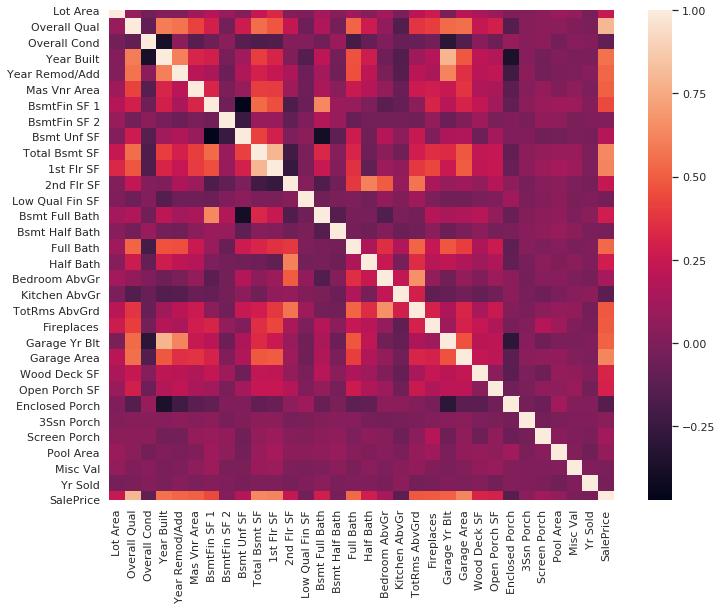

In [19]:
# Correlation Matrix Heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1., square=True);

In [20]:
print(np.sort(abs(corrmat[['SalePrice']]),axis=None))

[0.01321651 0.01680351 0.02638592 0.02697489 0.02998927 0.03901671
 0.07213842 0.10235269 0.11995438 0.12000855 0.1330066  0.13828228
 0.1801554  0.24501395 0.25244436 0.2782622  0.27982798 0.30121239
 0.31552114 0.43952118 0.48388188 0.49205646 0.5059787  0.5129216
 0.52824313 0.53661566 0.55982329 0.62588208 0.63078532 0.63518759
 0.79902207 1.        ]


In [21]:
# Top 13 (for which correlation is > 0.4) Heatmap 
k = 13 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

In [22]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,Overall Qual
2,Total Bsmt SF
3,Garage Area
4,1st Flr SF
5,Year Built
6,Full Bath
7,Year Remod/Add
8,Garage Yr Blt
9,Mas Vnr Area


## Outlier detection

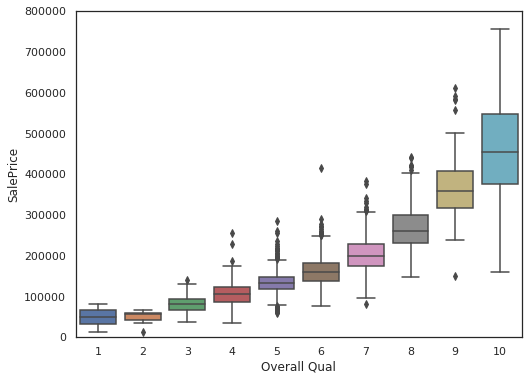

In [24]:
# Overall Quality vs Sale Price
var = 'Overall Qual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

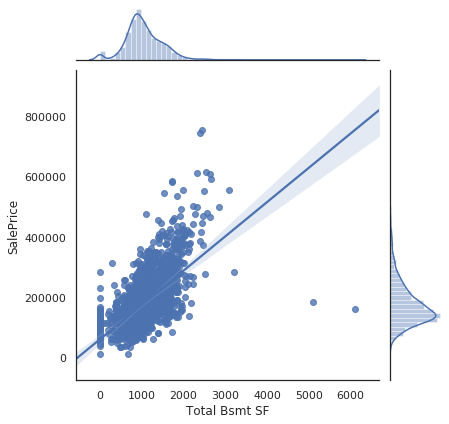

In [25]:
# Total Bsmt SF vs Sale Price
sns.jointplot(x=df['Total Bsmt SF'], y=df['SalePrice'], kind='reg')

In [26]:
# Removing outliers manually
df = df.drop(df[(df['Total Bsmt SF']>4000) 
                         & (df['SalePrice']<200000)].index).reset_index(drop=True)

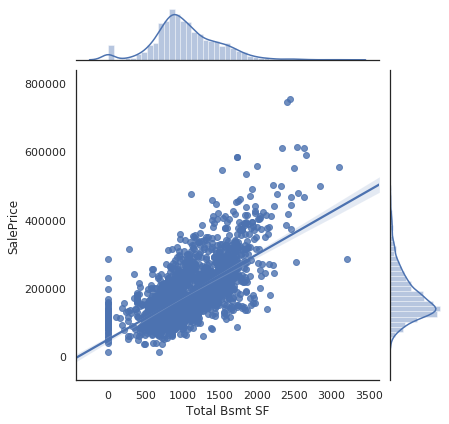

In [27]:
# Total Bsmt SF vs Sale Price
sns.jointplot(x=df['Total Bsmt SF'], y=df['SalePrice'], kind='reg')

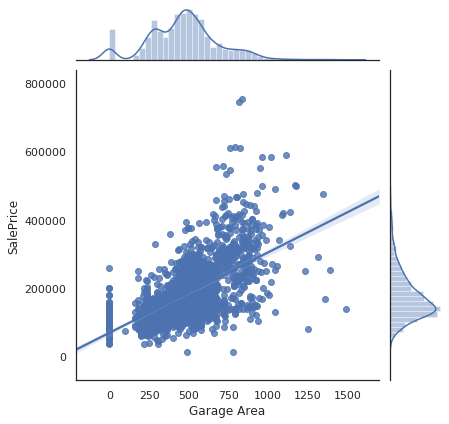

In [28]:
# Garage Area vs Sale Price
sns.jointplot(x=df['Garage Area'], y=df['SalePrice'], kind='reg')

In [29]:
# Removing outliers manually
df = df.drop(df[(df['Garage Area']>500) 
                         & (df['SalePrice']>700000)].index).reset_index(drop=True)

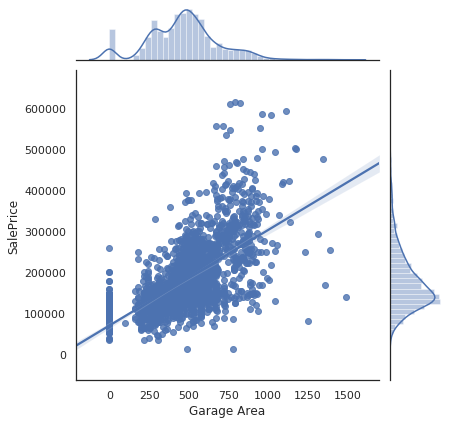

In [30]:
# Garage Area vs Sale Price
sns.jointplot(x=df['Garage Area'], y=df['SalePrice'], kind='reg')

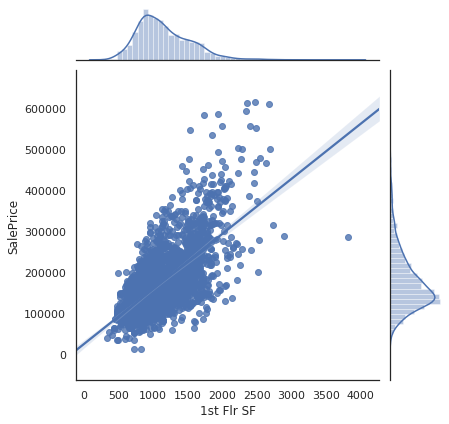

In [32]:
# First Floor Area vs Sale Price
sns.jointplot(x=df['1st Flr SF'], y=df['SalePrice'], kind='reg')

In [33]:
# Removing outliers manually
df = df.drop(df[(df['1st Flr SF']>3000) 
                         & (df['SalePrice']<400000)].index).reset_index(drop=True)

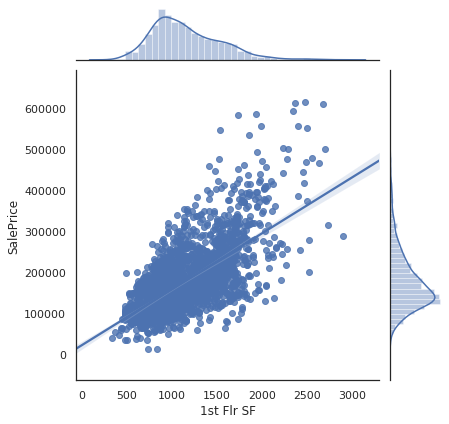

In [34]:
# First Floor Area vs Sale Price
sns.jointplot(x=df['1st Flr SF'], y=df['SalePrice'], kind='reg')

In [35]:
print(df['Year Built'].min())
print(df['Year Built'].max())

1875.0
2010.0


In [36]:
df = df.rename(columns={'Year Built': 'YearBuilt'})

In [37]:
# converting the 'Year Built' feature into categorical. Emphasising more on the present.
df['YearBuilt_Cat'] = 0
df.loc[df.YearBuilt <= 1925,'YearBuilt_Cat'] = 0
df.loc[(df.YearBuilt > 1925) & (df.YearBuilt <= 1975),'YearBuilt_Cat'] = 1
df.loc[(df.YearBuilt > 1975) & (df.YearBuilt <= 2000),'YearBuilt_Cat'] = 2
df.loc[(df.YearBuilt > 2000),'YearBuilt_Cat'] = 3
df.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,YearBuilt_Cat
0,60,RL,8795.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0.0,0.0,0.0,0.0,4,2009.0,WD,Normal,236000.0,2
1,20,RL,10170.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0.0,0.0,0.0,0.0,6,2006.0,WD,Normal,155000.0,1
2,160,RM,2001.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0.0,0.0,0.0,0.0,1,2007.0,WD,Normal,75000.0,1
3,20,RL,10552.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,...,0.0,0.0,0.0,0.0,4,2010.0,WD,Normal,165500.0,1
4,190,RM,10120.0,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,...,0.0,0.0,0.0,0.0,1,2007.0,WD,Normal,122000.0,0


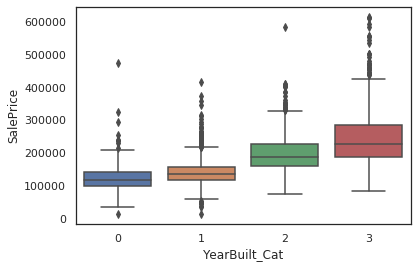

In [40]:
sns.boxplot(x=df['YearBuilt_Cat'], y=df['SalePrice'])

In [41]:
# Removing outliers manually
df = df.drop(df[(df['YearBuilt_Cat']==0) 
                         & (df['SalePrice']>300000)].index).reset_index(drop=True)
df = df.drop(df[(df['YearBuilt_Cat']==1) 
                         & (df['SalePrice']>350000)].index).reset_index(drop=True)
df = df.drop(df[(df['YearBuilt_Cat']==2) 
                         & (df['SalePrice']>400000)].index).reset_index(drop=True)
df = df.drop(df[(df['YearBuilt_Cat']==3) 
                         & (df['SalePrice']>500000)].index).reset_index(drop=True)

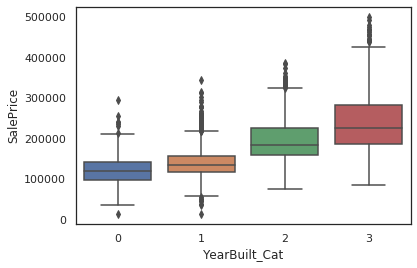

In [43]:
sns.boxplot(x=df['YearBuilt_Cat'], y=df['SalePrice'])

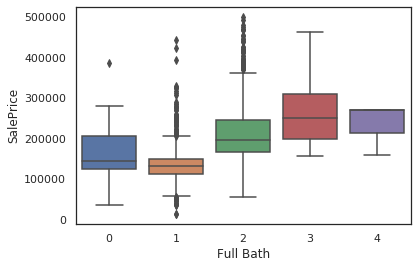

In [44]:
# Full Bath vs Sale Price
sns.boxplot(x=df['Full Bath'], y=df['SalePrice'])

In [45]:
# Removing outliers manually
df = df.drop(df[(df['Full Bath']==0) 
                         & (df['SalePrice']>300000)].index).reset_index(drop=True)
df = df.drop(df[(df['Full Bath']==1) 
                         & (df['SalePrice']>350000)].index).reset_index(drop=True)
df = df.drop(df[(df['Full Bath']==1) 
                         & (df['SalePrice']<70000)].index).reset_index(drop=True)
df = df.drop(df[(df['Full Bath']==2) 
                         & (df['SalePrice']>400000)].index).reset_index(drop=True)

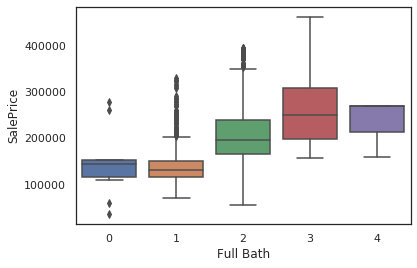

In [46]:
sns.boxplot(x=df['Full Bath'], y=df['SalePrice'])

## Here we check outliers for first 5 most correlated features with sale price.

# Feature Engineering

In [47]:
# Getting Description
df['SalePrice'].describe()

count      2336.000000
mean     175403.159247
std       64570.548072
min       35311.000000
25%      129725.000000
50%      160000.000000
75%      210000.000000
max      462000.000000
Name: SalePrice, dtype: float64


 mu = 175403.16 and sigma = 64556.73



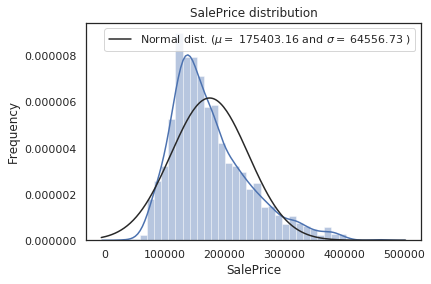

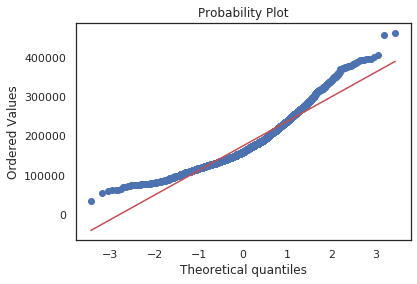

Skewness: 1.046828
Kurtosis: 1.015573


In [48]:
# Plot Histogram
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())


 mu = 12.01 and sigma = 0.35



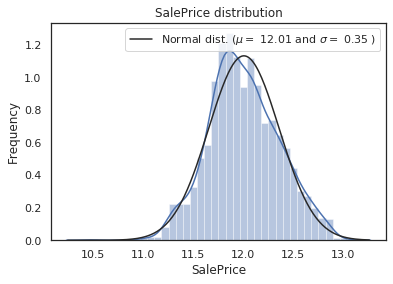

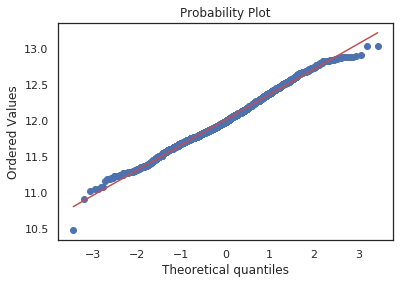

Skewness: 0.122376
Kurtosis: -0.122163


In [49]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

y_train = df.SalePrice.values

print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())